In [2]:
import json
import requests

from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, LSTM
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error

Using TensorFlow backend.


In [39]:
sns.set_palette('Set2')
%matplotlib inline

## Data from 2013

#### Visualization

In [79]:
# API of Cryptographic currency in json format
url = 'https://min-api.cryptocompare.com/data/histoday'
res = requests.get(url + '?fsym=BTC&tsym=USD&limit=2000')
hist = pd.DataFrame(json.loads(res.content)['Data'])
hist = hist.set_index('time')
hist.index = pd.to_datetime(hist.index, unit='s')

http://pandas.pydata.org/pandas-docs/version/0.13/visualization.html

In [91]:
hist.head()

,close,high,low,open,volumefrom,volumeto
time,,,,,,
2013-03-28,86.18,95.70,75.00,88.92,140263.09,1.226115e+07
2013-03-29,521.40,571.56,458.01,530.78,784490.01,6.868987e+07
2013-03-30,1837.39,1995.78,1627.05,1855.20,2557103.76,2.242578e+08
2013-03-31,4927.78,5314.10,4396.15,4949.59,6364379.10,5.589610e+08
2013-04-01,11152.10,11955.80,10007.59,11152.18,13485005.72,1.186880e+09


<Figure size 432x288 with 0 Axes>

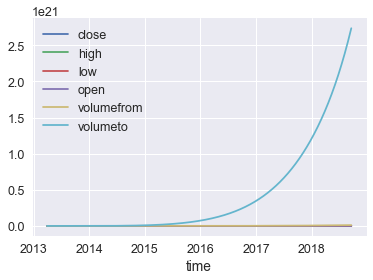

In [86]:
hist = hist.cumsum()
plt.figure(); 
hist.plot()
plt.legend(loc='best')

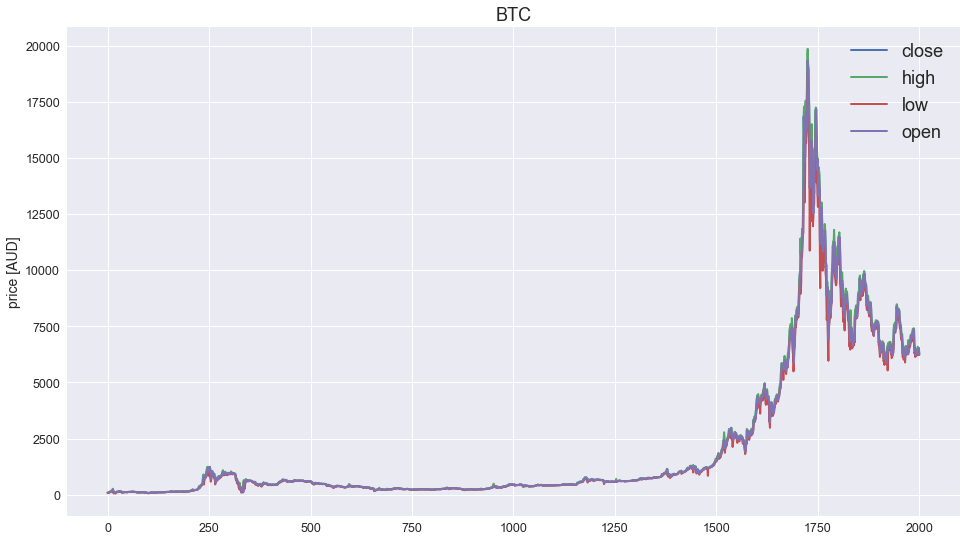

In [90]:
def line_plot(line1,line2,line3,line4,label1=None, label2=None,label3=None,label4=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(16, 9))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.plot(line3, label=label3, linewidth=lw)
    ax.plot(line4, label=label4, linewidth=lw)
    ax.set_ylabel('price [AUD]', fontsize=14)
    ax.set_title(title, fontsize=18)
    ax.legend(loc='best', fontsize=18);

line_plot(hist1['close'], hist1['high'],hist1['low'],hist1['open'],'close','high','low','open',title='BTC')

In [56]:
# API of Cryptographic currency in json format
url = 'https://min-api.cryptocompare.com/data/histoday'
res = requests.get(url + '?fsym=BTC&tsym=USD&limit=2000')
hist = pd.DataFrame(json.loads(res.content)['Data'])

In [57]:
hist1 = hist.drop(columns = ['time'])  
hist1.head()

,close,high,low,open,volumefrom,volumeto
0,86.18,95.70,75.00,88.92,140263.09,12261153.08
1,90.50,93.06,83.01,86.18,83174.56,7384104.11
2,92.19,94.98,87.00,90.50,37284.61,3420002.53
3,93.03,93.80,91.00,92.19,21129.50,1959050.82
4,104.00,106.00,92.24,93.03,90563.17,9060022.27


In [67]:
hist1.corr(method='pearson', min_periods=1)[hist1.columns]

,close,high,low,open,volumefrom,volumeto
close,1.000000,0.999137,0.998677,0.997682,0.403162,0.861408
high,0.999137,1.000000,0.997769,0.998912,0.413304,0.873240
low,0.998677,0.997769,1.000000,0.997852,0.389784,0.843521
open,0.997682,0.998912,0.997852,1.000000,0.407274,0.866338
volumefrom,0.403162,0.413304,0.389784,0.407274,1.000000,0.584361
volumeto,0.861408,0.873240,0.843521,0.866338,0.584361,1.000000


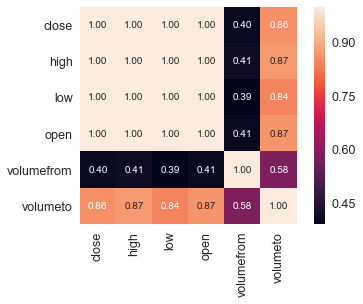

In [70]:
corr_matrix = hist1.corr()
cols = hist1.columns
cm = np.corrcoef(hist1[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

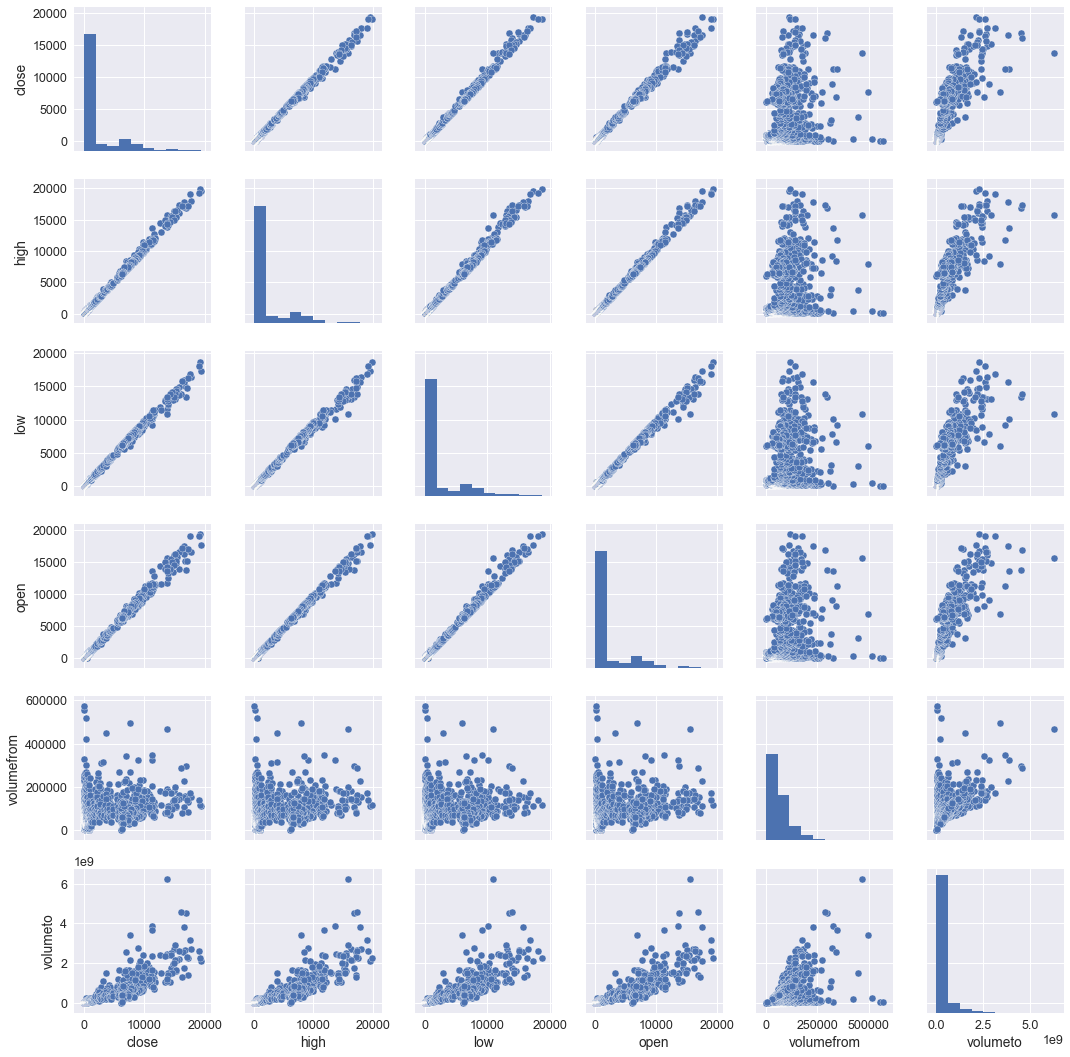

In [72]:
feature_relation = sns.pairplot(hist1)

In [ ]:
#VIF（variance inflation factor）
#Inspect the factors for each predictor variable, if the VIF is between 5-10, multicolinearity is likely present.
#If VIF > 10, multicolinearity is sever.

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(hist1.values, i) for i in range(hist1.shape[1])]
vif["features"] = hist1.columns

In [77]:
vif.round(2)

,VIF Factor,features
0,2147.55,close
1,3292.95,high
2,1975.77,low
3,1190.39,open
4,1.80,volumefrom
5,19.39,volumeto


## Data from 2018

### Visualization

In [94]:
# API of Cryptographic currency in json format
url = 'https://min-api.cryptocompare.com/data/histoday'
res = requests.get(url + '?fsym=BTC&tsym=USD&limit=2000')
hist = pd.DataFrame(json.loads(res.content)['Data'])
hist = hist.set_index('time')
hist.index = pd.to_datetime(hist.index, unit='s')
hist = hist[hist.index>='2018-01-01']
hist.head()

,close,high,low,open,volumefrom,volumeto
time,,,,,,
2018-01-01,13444.88,13921.53,12877.67,13850.49,78425.21,1.057522e+09
2018-01-02,14754.13,15306.13,12934.16,13444.88,137732.17,1.956783e+09
2018-01-03,15156.62,15435.01,14579.71,14754.09,106543.39,1.604207e+09
2018-01-04,15180.08,15408.66,14244.67,15156.49,110968.82,1.656715e+09
2018-01-05,16954.78,17126.95,14832.36,15180.08,141960.42,2.283989e+09


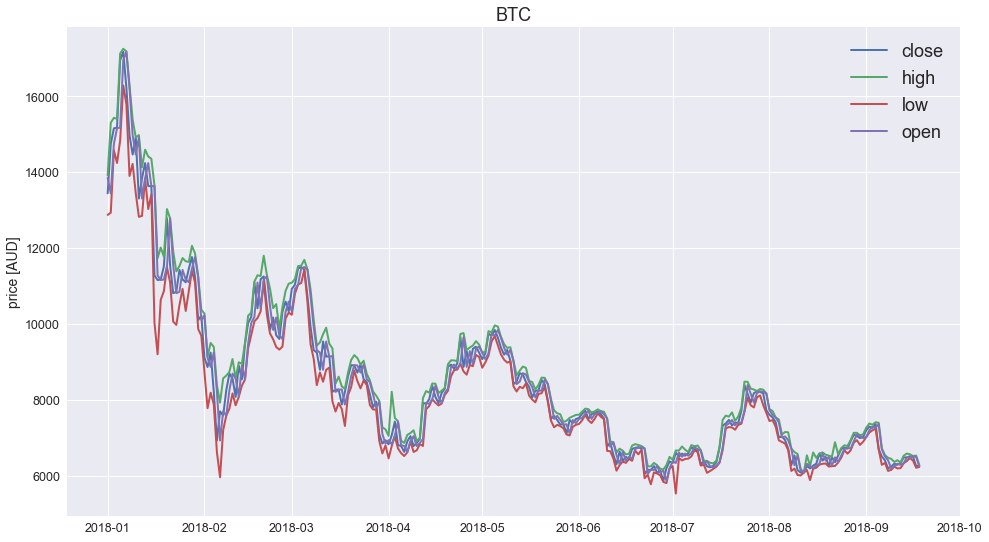

In [96]:
def line_plot(line1,line2,line3,line4,label1=None, label2=None,label3=None,label4=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(16, 9))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.plot(line3, label=label3, linewidth=lw)
    ax.plot(line4, label=label4, linewidth=lw)
    ax.set_ylabel('price [AUD]', fontsize=14)
    ax.set_title(title, fontsize=18)
    ax.legend(loc='best', fontsize=18);

line_plot(hist['close'], hist['high'],hist['low'],hist['open'],'close','high','low','open',title='BTC')

### Statistical analysis

In [116]:
# API of Cryptographic currency in json format
url = 'https://min-api.cryptocompare.com/data/histoday'
res = requests.get(url + '?fsym=BTC&tsym=USD&limit=2000')
hist = pd.DataFrame(json.loads(res.content)['Data'])
hist['time'] = pd.to_datetime(hist['time'], unit='s')
hist = hist[hist['time']>='2018-01-01']

In [117]:
hist1 = hist.drop(columns = ['time'])  #必须付给一个新表，不然表本身没有变化的，并不会drop 
hist1.head()

,close,high,low,open,volumefrom,volumeto
1740,13444.88,13921.53,12877.67,13850.49,78425.21,1.057522e+09
1741,14754.13,15306.13,12934.16,13444.88,137732.17,1.956783e+09
1742,15156.62,15435.01,14579.71,14754.09,106543.39,1.604207e+09
1743,15180.08,15408.66,14244.67,15156.49,110968.82,1.656715e+09
1744,16954.78,17126.95,14832.36,15180.08,141960.42,2.283989e+09


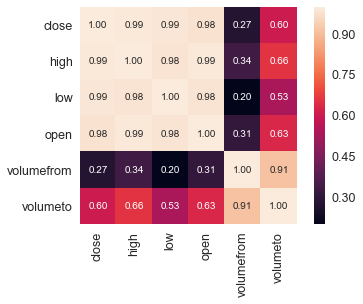

In [118]:
corr_matrix = hist1.corr()
cols = hist1.columns
cm = np.corrcoef(hist1[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [119]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(hist1.values, i) for i in range(hist1.shape[1])]
vif["features"] = hist1.columns

In [120]:
vif.round(2)

,VIF Factor,features
0,2367.50,close
1,4257.38,high
2,3219.32,low
3,1813.04,open
4,22.56,volumefrom
5,55.26,volumeto


## Creat new feature

In [137]:
# API of Cryptographic currency in json format
url = 'https://min-api.cryptocompare.com/data/histoday'
res = requests.get(url + '?fsym=BTC&tsym=USD&limit=2000')
hist = pd.DataFrame(json.loads(res.content)['Data'])
hist = hist.set_index('time')
hist.index = pd.to_datetime(hist.index, unit='s')

In order to promise data integrity, get mean value rather than drop some columns

In [139]:
hist['price'] = (hist['close']+hist['high']+hist['low']+hist['open'])/4
hist['volume'] = (hist['volumeto']+hist['volumefrom'])/2
hist1 = hist.drop(columns = ['close','high','low','open','volumeto','volumefrom'])
hist1.head()

,price,volume
time,,
2013-03-28,86.4500,6200708.085
2013-03-29,88.1875,3733639.335
2013-03-30,91.1675,1728643.570
2013-03-31,92.5050,990090.160
2013-04-01,98.8175,4575292.720


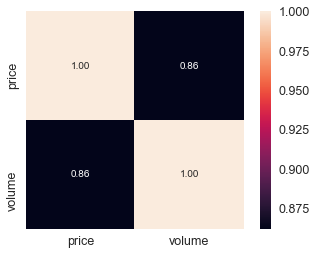

In [140]:
corr_matrix = hist1.corr()
cols = hist1.columns
cm = np.corrcoef(hist1[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [141]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(hist1.values, i) for i in range(hist1.shape[1])]
vif["features"] = hist1.columns
vif.round(2)

,VIF Factor,features
0,4.49,price
1,4.49,volume


In [144]:
import csv
hist1.to_csv('Bitcoin.csv')